In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# Configurar un estilo visual para las gráficas
sns.set_style('whitegrid')

# Carga tu dataset procesado. La carga será casi instantánea.
df = pd.read_parquet(r"../data/processed/cic_ids_2017_optimized.parquet")

# Muestra las primeras filas para confirmar que todo cargó bien
df.head()

c:\Users\brand\anaconda3\envs\cyber-project-py311\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
c:\Users\brand\anaconda3\envs\cyber-project-py311\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [72]:
# Información básica del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2827876 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                       Dtype   
---  ------                       -----   
 0   Destination Port             int32   
 1   Flow Duration                int32   
 2   Total Fwd Packets            int32   
 3   Total Backward Packets       int32   
 4   Total Length of Fwd Packets  int32   
 5   Total Length of Bwd Packets  int32   
 6   Fwd Packet Length Max        int16   
 7   Fwd Packet Length Min        int16   
 8   Fwd Packet Length Mean       float16 
 9   Fwd Packet Length Std        float16 
 10  Bwd Packet Length Max        int16   
 11  Bwd Packet Length Min        int16   
 12  Bwd Packet Length Mean       float16 
 13  Bwd Packet Length Std        float16 
 14  Flow Bytes/s                 float32 
 15  Flow Packets/s               float32 
 16  Flow IAT Mean                float32 
 17  Flow IAT Std                 float32 
 18  Flow IAT Max               

In [73]:
# Estadísticas descriptivas
df.describe()

c:\Users\brand\anaconda3\envs\cyber-project-py311\Lib\site-packages\pandas\core\nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
c:\Users\brand\anaconda3\envs\cyber-project-py311\Lib\site-packages\numpy\_core\_methods.py:51: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\brand\anaconda3\envs\cyber-project-py311\Lib\site-packages\pandas\core\nanops.py:731: RuntimeWarning: invalid value encountered in scalar divide
  the_mean = the_sum / count if count > 0 else np.nan
c:\Users\brand\anaconda3\envs\cyber-project-py311\Lib\site-packages\pandas\core\nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
c:\Users\brand\anaconda3\envs\cyber-project-py311\Lib\site-packages\numpy\_core\_methods.py:51: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\brand\anaconda3\envs\cyber-project-py311\

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2827876.0,2.827876e+06,...,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2827876.0,2.827876e+06,2.827876e+06,2.827876e+06
mean,8.061534e+03,1.480065e+07,9.368972e+00,1.040396e+01,5.498522e+02,1.617903e+04,2.078044e+02,1.872929e+01,NaN,NaN,...,5.423519e+00,-2.744494e+03,8.163400e+04,4.117582e+04,1.533378e+05,5.835492e+04,8324468.0,5.043548e+05,8.704568e+06,7.928061e+06
std,1.827432e+04,3.366750e+07,7.500527e+02,9.978937e+02,9.998639e+03,2.264235e+06,7.175183e+02,6.035533e+01,0.0,0.000000e+00,...,6.367482e+02,1.085539e+06,6.489234e+05,3.935787e+05,1.026333e+06,5.773818e+05,23640570.0,4.605289e+06,2.437766e+07,2.337390e+07
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,1.550000e+02,2.000000e+00,1.000000e+00,1.200000e+01,2.000000e+00,6.000000e+00,0.000000e+00,6.0,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,3.133800e+04,2.000000e+00,2.000000e+00,6.200000e+01,1.230000e+02,3.700000e+01,2.000000e+00,34.0,0.000000e+00,...,1.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,3.239368e+06,5.000000e+00,4.000000e+00,1.880000e+02,4.840000e+02,8.100000e+01,3.600000e+01,50.0,2.615625e+01,...,2.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5940.0,7.124000e+03,...,2.135570e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,120000000.0,7.690000e+07,1.200000e+08,1.200000e+08


In [74]:
# Contar el número de ocurrencias de cada categoría en la columna 'Label'
label_counts = df['Label'].value_counts()

print("Distribución de Clases:")
print(label_counts)

Distribución de Clases:
Label
BENIGN                        2271320
DoS Hulk                       230124
PortScan                       158804
DDoS                           128025
DoS GoldenEye                   10293
FTP-Patator                      7935
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1956
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


In [75]:
# Reemplaza el carácter extraño (�) con nada ('') en toda la columna 'Label'
# El regex = False es para que lo trate como texto literal.
caracter_malo = '�'

# Reemplazamos el carácter malo por un espacio para limpiar las etiquetas
df['Label'] = df['Label'].str.replace(caracter_malo, '', regex = False)

# Colapsa cualquier secuencia de uno o más espacios en un solo espacio
df['Label'] = df['Label'].str.replace(r'\s+', ' ', regex = True)

# Quitamos cualquier espacio sobrante al inicio o al final
df['Label'] = df['Label'].str.strip()

# Vuelve a verificar que los nombres estén limpios
label_counts = df['Label'].value_counts()
print("Conteo de etiquetas después de la limpieza:")
print(label_counts)

Conteo de etiquetas después de la limpieza:
Label
BENIGN                      2271320
DoS Hulk                     230124
PortScan                     158804
DDoS                         128025
DoS GoldenEye                 10293
FTP-Patator                    7935
SSH-Patator                    5897
DoS slowloris                  5796
DoS Slowhttptest               5499
Bot                            1956
Web Attack Brute Force         1507
Web Attack XSS                  652
Infiltration                     36
Web Attack Sql Injection         21
Heartbleed                       11
Name: count, dtype: int64


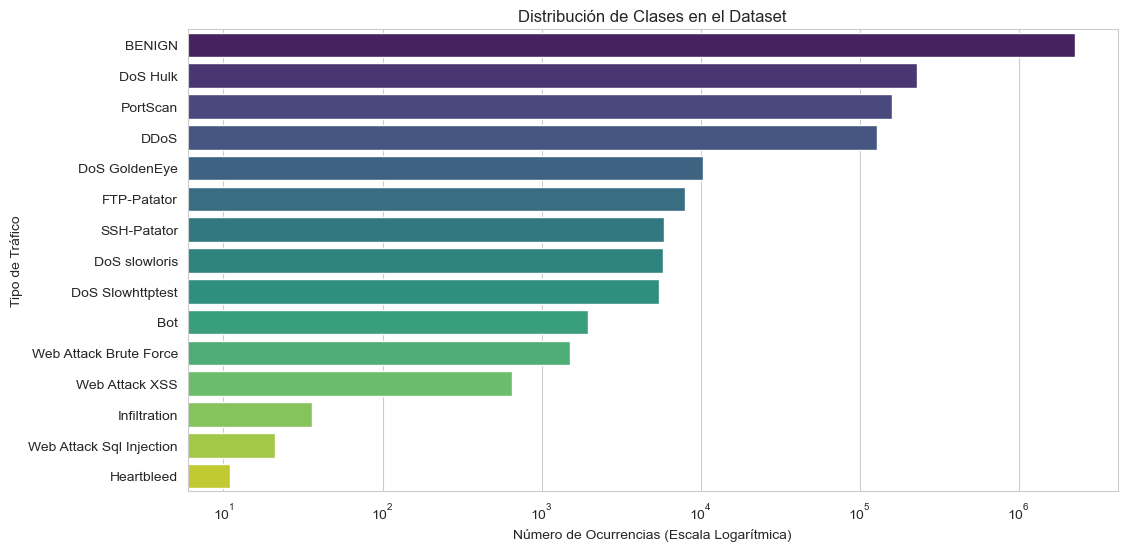

In [76]:
# Visualizar la distribución de clases
label_counts = df['Label'].value_counts()
plt.figure(figsize = (12, 6))
sns.barplot(x = label_counts.values, y = label_counts.index, hue = label_counts.index, palette = 'viridis', legend = False)
plt.title('Distribución de Clases en el Dataset')
plt.xlabel('Número de Ocurrencias (Escala Logarítmica)')
plt.ylabel('Tipo de Tráfico')
plt.xscale('log');